In [1]:
import sys
sys.path.insert(0,'../')
import math
from copy import deepcopy

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from models import TwoLayerNet
from trainer import *
    
def visualize_weight(net):
    fig,axs = plt.subplots(1,4,figsize=(17,4))
    axs[0].plot(net.fc1.weight.data.view(-1).numpy(),'.')
    axs[0].set_title('fc1.weight')
    axs[1].plot(net.fc1.bias.data.view(-1).numpy(),'.')
    axs[1].set_title('fc1.bias')
    axs[2].plot(net.fc2.weight.data.view(-1).numpy(),'.')
    axs[2].set_title('fc2.weight')
    axs[3].plot(net.fc2.bias.data.view(-1).numpy(),'.')
    axs[3].set_title('fc2.bias')
    

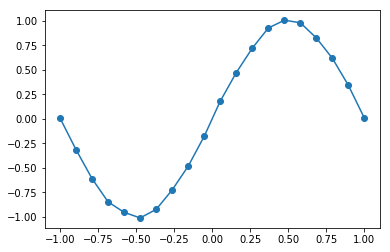

In [2]:
# generate data
def gen_data(n=10):
    func = lambda t: np.sin(np.pi*t*1);
    xR = np.linspace(-1,1,n) 
    yR = func(xR)+ np.random.randn(n)*0.01
    return xR,yR

class MyDataSet:
    def __init__(self,n,device=torch.device('cpu')):
        self.x_np, self.y_np = gen_data(n)
        self.x = torch.from_numpy(self.x_np).view(n,1).float().to(device)
        self.y = torch.from_numpy(self.y_np).view(n).float().to(device)
        
    def __getitem__(self,idx):
        return self.x[idx],self.y[idx]
    
    def __len__(self):
        return self.x.size(0)


xR,yR = gen_data(20)
plt.plot(xR,yR,'-o')

In [27]:
m = 1000
n = 10
nepochs = 10000
device = torch.device('cuda:1')
net = TwoLayerNet(1,m,1).to(device)
train_dl = DataLoader(MyDataSet(n,device),
                       batch_size=n,
                       shuffle=True)
test_dl = DataLoader(MyDataSet(100,device),
                       batch_size=100)

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(),lr=1e-3,momentum=0.99,nesterov=True)

xTrain,yTrain = gen_data(n)


# train the model

for epoch in range(nepochs):
    tr_err = train_epoch(net,criterion,optimizer,train_dl,device=device,lmbd=0)
    if epoch%1000 == 0:
        print('%d/%d, %.2e'%(epoch+1,nepochs,tr_err))

1/10000, 8.75e-01
1001/10000, 6.94e-04
2001/10000, 2.52e-05
3001/10000, 1.83e-06
4001/10000, 1.56e-07
5001/10000, 1.38e-08
6001/10000, 1.25e-09
7001/10000, 1.40e-10
8001/10000, 2.42e-11
9001/10000, 1.07e-11


### Test model

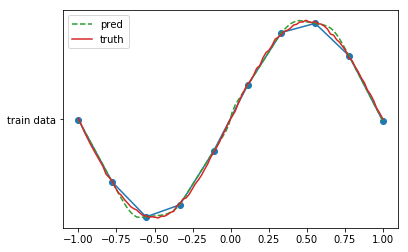

In [28]:
x_tr, y_tr = train_dl.dataset.x_np, train_dl.dataset.y_np
x_te, y_te = test_dl.dataset.x_np, test_dl.dataset.y_np

y_te_pred = net(test_dl.dataset.x).data.cpu().numpy()
plt.plot(x_tr,y_tr,'o-','train data')
plt.plot(x_te,y_te_pred,'--',label='pred')
plt.plot(x_te,y_te,'-',label='truth')
plt.legend()

In [13]:
net = TwoLayerNet(1,100,1).to(torch.device('cuda:1'))
net0 = deepcopy(net)

RuntimeError: CUDA error: out of memory

In [12]:
net.A

Parameter containing:
tensor([[ 0.0039,  0.1695, -0.1381, -0.2117,  0.0724,  0.2344,  0.1066, -0.1055,
          0.1175, -0.0413, -0.0325,  0.0583, -0.1138,  0.0607,  0.0423,  0.1108,
          0.0198,  0.0468,  0.1578,  0.1508,  0.0558,  0.1412,  0.0848, -0.1535,
          0.0206,  0.0347, -0.0392,  0.0613,  0.1931,  0.3003, -0.1014,  0.3148,
          0.0264,  0.0553,  0.0930,  0.2066,  0.2397,  0.1697,  0.0243, -0.1464,
         -0.1129, -0.1896, -0.1327, -0.1026, -0.2470, -0.1457,  0.0396, -0.1917,
          0.1137, -0.0373,  0.0596,  0.0763,  0.1012,  0.0293, -0.0118,  0.0790,
         -0.0204, -0.0282, -0.0328,  0.0568,  0.3325, -0.0620,  0.0707, -0.0766,
          0.0249,  0.0496,  0.1224, -0.0406, -0.0671,  0.1792, -0.0787, -0.0310,
         -0.0256, -0.0309, -0.1689,  0.1365,  0.2016,  0.1628,  0.1627,  0.1400,
         -0.2756,  0.0175, -0.2270, -0.1446,  0.0939, -0.0118, -0.2044,  0.1601,
          0.0661, -0.2213,  0.0488,  0.0848, -0.0643,  0.3134, -0.1235, -0.0794,
      

### Initialized Solution

In [ ]:
visualize_weight(net0)
print('==> initial path_norm: %.2e, group_norm: %.2e'%(net0.path_norm(),net0.group_norm()))
print('network width is %d'%(m))

### Trained Solution

In [ ]:
visualize_weight(net)
print('==> final path_norm: %.2e, group_norm: %.2e'%(net.path_norm(),net.group_norm()))
print('network width is %d'%(m))

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,3,1)
dB = net.fc1.weight.data - net0.fc1.weight.data
plt.title('dB: %.2e'%(dB.norm()))
plt.plot(dB.view(-1).numpy(),'.')

plt.subplot(1,3,2)
dC = net.fc1.bias.data - net0.fc1.bias.data
plt.title('dC: %.2e'%(dC.norm()))
plt.plot(dC.view(-1).numpy(),'.')

plt.subplot(1,3,3)
dA = net.fc2.weight.data - net0.fc2.weight.data
plt.title('dA: %.2e'%(dA.norm()))
plt.plot(dA.view(-1).numpy(),'.')

In [ ]:
b = net.fc1.weight.data.view(-1)
c = net.fc1.bias.data.view(-1)
a = net.fc2.weight.data.view(-1)

print(a.norm()**2 - b.norm()**2-c.norm()**2)

In [ ]:
b = net0.fc1.weight.data.view(-1)
c = net0.fc1.bias.data.view(-1)
a = net0.fc2.weight.data.view(-1)

print(a.norm()**2 - b.norm()**2-c.norm()**2)

---
### Test functions with the same path norm

In [ ]:
net_p = deepcopy(net)
A = net_p.fc2.weight.data
B = net_p.fc1.weight.data
C = net_p.fc1.bias.data

Q = torch.zeros_like(A).normal_(0,1)
T = A*Q
A.copy_(T)

Q = torch.zeros_like(C).normal_(0,1)
T = C*Q
C.copy_(T)

Q = torch.zeros_like(B).normal_(0,1)
T = B*Q
B.copy_(T)

xTest = torch.linspace(-2,4,n*10).view(n*10,1)
yTest_p = net_p(Variable(xTest)).data
yTest_p0 = net0(Variable(xTest)).data

xTest = xTest.numpy()
yTest_p = yTest_p.numpy()
yTest_p0 = yTest_p0.numpy()


plt.plot(xTest,yTest_p0,'--',label='initialization')
plt.plot(xTest,yTest_p,'-',label='model')
plt.plot(xTrain,yTrain,'o',label='data')
plt.legend()

In [ ]:
net_p = deepcopy(net)
A = net_p.fc2.weight.data
B = net_p.fc1.weight.data
C = net_p.fc1.bias.data

Q = torch.zeros_like(A).normal_(0,1)
T = A*A.sign()
A.copy_(T)

Q = torch.zeros_like(C).normal_(0,1)
T = C*C.sign()
C.copy_(T)

Q = torch.zeros_like(B).normal_(0,1)
T = B*B.sign()
B.copy_(T)

xTest = torch.linspace(-2,4,n*10).view(n*10,1)
yTest_p = net_p(Variable(xTest)).data
yTest_p0 = net0(Variable(xTest)).data

xTest = xTest.numpy()
yTest_p = yTest_p.numpy()
yTest_p0 = yTest_p0.numpy()


plt.plot(xTest,yTest_p0,'--',label='initialization')
plt.plot(xTest,yTest_p,'-',label='model')
plt.plot(xTrain,yTrain,'o',label='data')
plt.legend()